# PLANNING

## Environment

In [1]:
# For reproducibility
import numpy as np

# Set random seed for reproducibility
np.random.seed(493)

# Manipulating dataframes etc.
import pandas as pd

# To print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# ACQUIRE DATA

In [2]:
# Load to df
df = pd.read_csv("../data/fakeville_rent.csv")

# PREPARE DATA

In [3]:
# Check column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SquareFeet          527 non-null    float64
 1   Bedrooms            527 non-null    float64
 2   Bathrooms           527 non-null    float64
 3   Age                 526 non-null    float64
 4   Floor               553 non-null    int64  
 5   DistanceToDowntown  525 non-null    float64
 6   HasParking          553 non-null    int64  
 7   Rent                553 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 34.7 KB


In [4]:
# Numerical summary
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Age,Floor,DistanceToDowntown,HasParking,Rent
count,527.000000,527.000000,527.000000,526.000000,553.000000,525.000000,553.000000,553.000000
mean,847.869070,2.037951,1.834915,22.956274,5.126582,5.035886,0.737794,2996.721754
std,195.564543,0.920036,0.909014,14.310435,2.542087,1.932683,0.440232,555.558410
min,400.000000,1.000000,1.000000,0.000000,1.000000,0.040000,0.000000,1741.330000
25%,711.000000,1.000000,1.000000,10.000000,3.000000,3.670000,0.000000,2593.870000
50%,843.000000,2.000000,2.000000,23.000000,5.000000,4.930000,1.000000,2932.490000
75%,972.000000,3.000000,2.000000,35.000000,7.000000,6.390000,1.000000,3344.280000
max,1456.000000,4.000000,4.000000,49.000000,9.000000,10.330000,1.000000,4807.080000


In [5]:
df.head()
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Age,Floor,DistanceToDowntown,HasParking,Rent
0,614.0,2.0,1.0,14.0,3,4.54,1,2457.91
1,1134.0,1.0,1.0,18.0,8,5.08,1,2949.49
2,880.0,2.0,1.0,18.0,5,3.48,1,3104.69
3,912.0,1.0,1.0,7.0,3,5.04,1,2685.09
4,873.0,3.0,NaN,48.0,2,2.79,1,3606.44


,SquareFeet,Bedrooms,Bathrooms,Age,Floor,DistanceToDowntown,HasParking,Rent
548,916.0,2.0,2.0,47.0,7,NaN,0,2703.11
549,674.0,3.0,3.0,18.0,1,4.06,1,3589.11
550,896.0,2.0,2.0,25.0,6,7.53,1,2493.28
551,848.0,4.0,4.0,0.0,6,3.95,1,4383.80
552,1069.0,2.0,1.0,12.0,8,3.06,1,3392.41


## Check for duplicates

In [6]:
# Number of dupliciate rows across all columns
df.duplicated().sum()

np.int64(16)

In [7]:
# View the duplicates
df[df.duplicated()]

,SquareFeet,Bedrooms,Bathrooms,Age,Floor,DistanceToDowntown,HasParking,Rent
537,805.0,2.0,2.0,32.0,4,6.96,1,2848.43
538,476.0,4.0,3.0,29.0,5,6.61,0,3474.70
539,1230.0,2.0,1.0,48.0,3,2.29,1,2951.64
540,1021.0,2.0,2.0,9.0,8,NaN,0,3509.04
541,666.0,1.0,1.0,28.0,4,7.72,1,2311.07
542,934.0,1.0,1.0,14.0,8,5.04,0,2692.32
543,1138.0,1.0,1.0,20.0,4,5.76,1,2588.13
544,847.0,1.0,1.0,18.0,9,5.15,1,2534.58
545,880.0,2.0,1.0,18.0,5,3.48,1,3104.69
546,695.0,1.0,1.0,12.0,1,8.28,0,2114.96


In [8]:
# Remove duplicates (across all rows)
df = df.drop_duplicates()

In [9]:
df.shape

(537, 8)

## Check for missing values

In [10]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

In [11]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SquareFeet,26,4.841713,0,0.0,0,0.0
Bedrooms,26,4.841713,0,0.0,0,0.0
Bathrooms,26,4.841713,0,0.0,0,0.0
Age,26,4.841713,0,0.0,0,0.0
Floor,0,0.000000,0,0.0,0,0.0
DistanceToDowntown,26,4.841713,0,0.0,0,0.0
HasParking,0,0.000000,0,0.0,0,0.0
Rent,0,0.000000,0,0.0,0,0.0


In [12]:
# Drop all rows with a NaN in any of the columns
df = df.dropna()

In [13]:
df.shape

(418, 8)

# EXPLORATORY DATA ANALYSIS

In [14]:
# Numerical feature summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric Summary:\n", df[numeric_cols].describe())


Numeric Summary:
         SquareFeet    Bedrooms   Bathrooms         Age       Floor  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean    842.351675    2.033493    1.813397   22.291866    5.045455   
std     197.492308    0.912912    0.899567   14.277348    2.499945   
min     400.000000    1.000000    1.000000    0.000000    1.000000   
25%     706.250000    1.000000    1.000000   10.000000    3.000000   
50%     835.500000    2.000000    2.000000   22.000000    5.000000   
75%     967.250000    3.000000    2.000000   34.000000    7.000000   
max    1453.000000    4.000000    4.000000   49.000000    9.000000   

       DistanceToDowntown  HasParking         Rent  
count          418.000000  418.000000   418.000000  
mean             5.097321    0.739234  2985.002990  
std              1.912078    0.439578   539.456159  
min              0.040000    0.000000  1840.150000  
25%              3.835000    0.000000  2610.485000  
50%              4.985000    1.0

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'DistanceToDowntown'}>],
       [<Axes: title={'center': 'HasParking'}>,
        <Axes: title={'center': 'Rent'}>, <Axes: >]], dtype=object)

Text(0.5, 0.98, 'Histograms of Numeric Features')

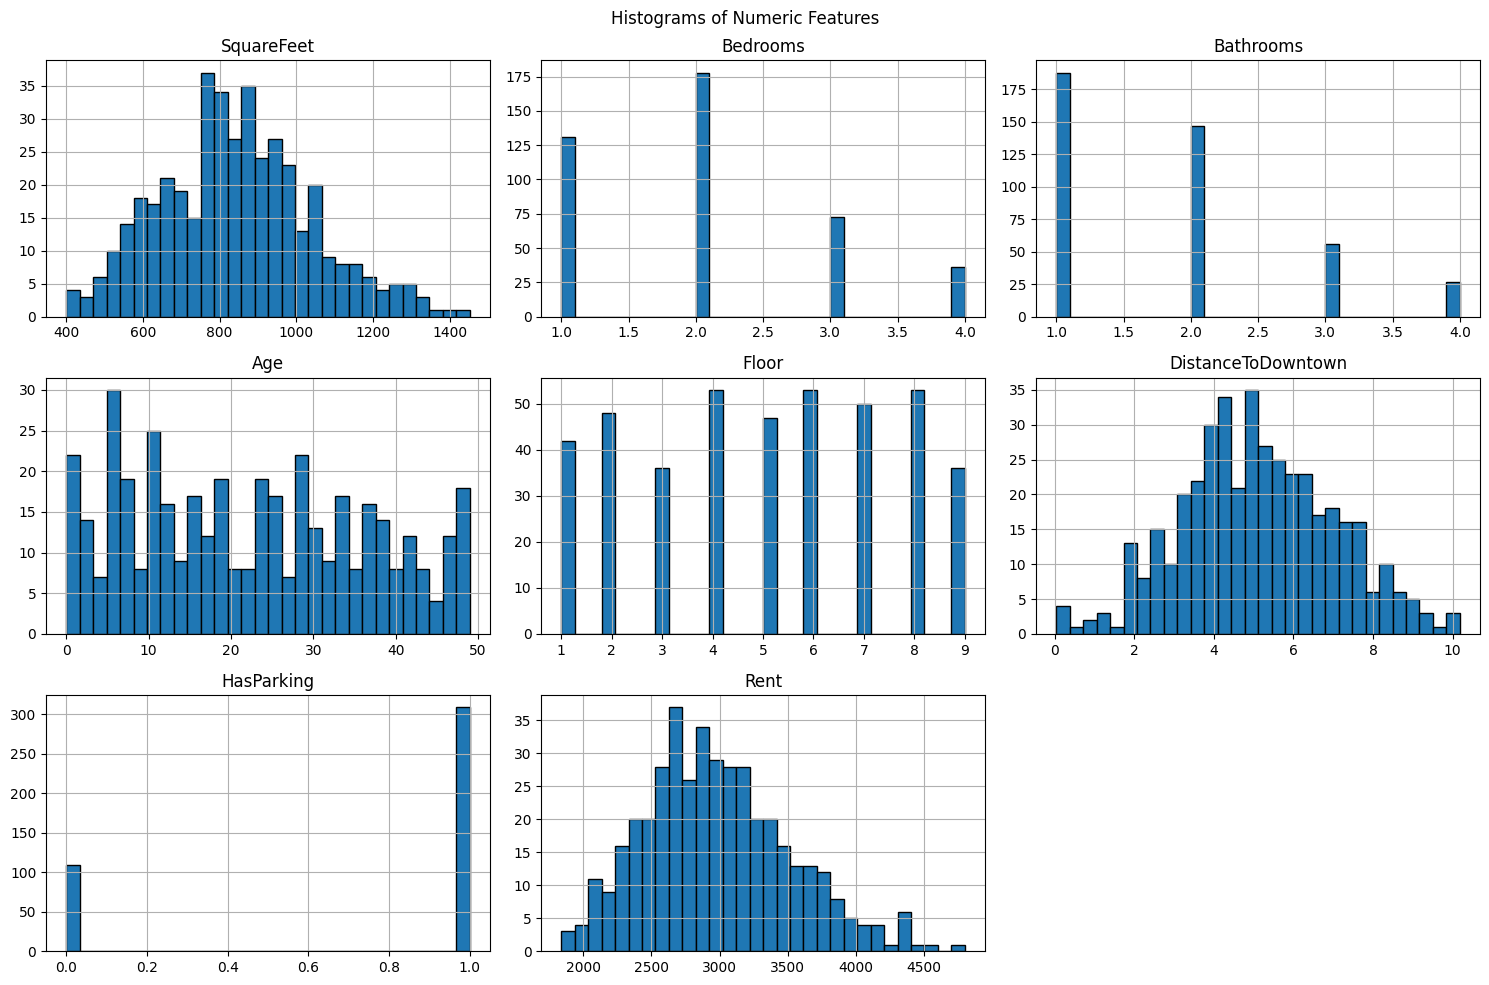

In [15]:
# Distribution Plots

import matplotlib.pyplot as plt
import seaborn as sns

df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

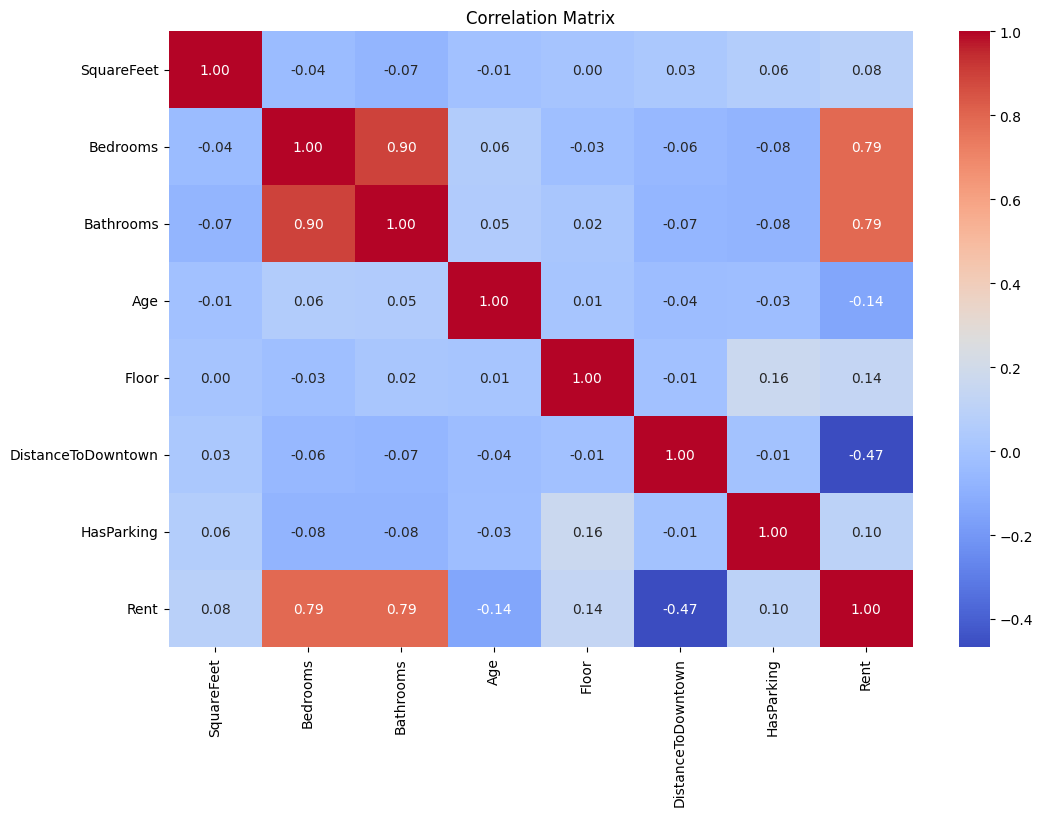

In [16]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Categorical Overview
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
for col in cat_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts(dropna=False))

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='SquareFeet'>

Text(0.5, 1.0, 'Boxplot for SquareFeet')

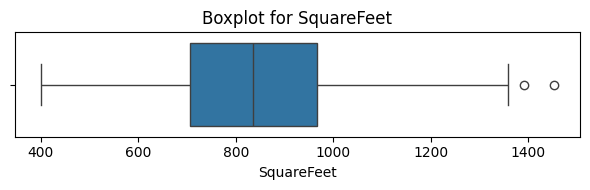

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='Bedrooms'>

Text(0.5, 1.0, 'Boxplot for Bedrooms')

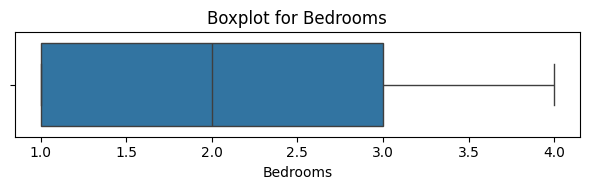

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='Bathrooms'>

Text(0.5, 1.0, 'Boxplot for Bathrooms')

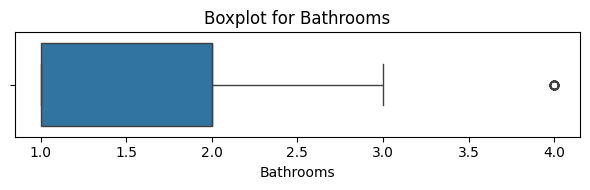

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='Age'>

Text(0.5, 1.0, 'Boxplot for Age')

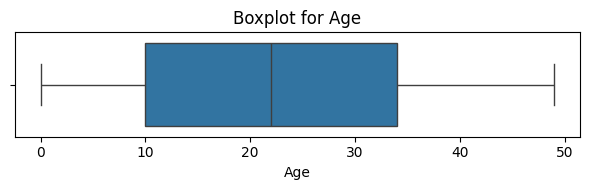

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='Floor'>

Text(0.5, 1.0, 'Boxplot for Floor')

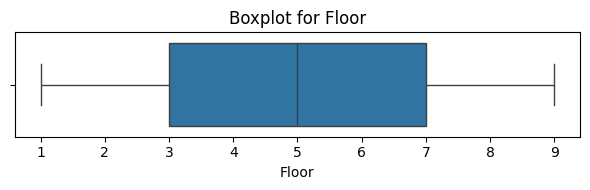

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='DistanceToDowntown'>

Text(0.5, 1.0, 'Boxplot for DistanceToDowntown')

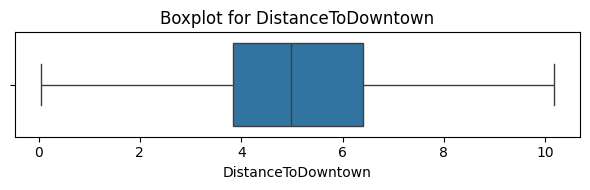

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='HasParking'>

Text(0.5, 1.0, 'Boxplot for HasParking')

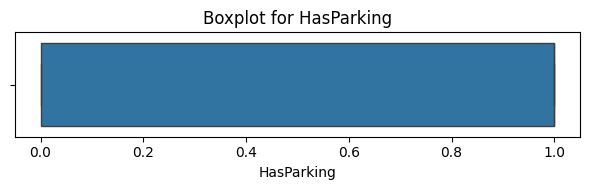

<Figure size 600x200 with 0 Axes>

<Axes: xlabel='Rent'>

Text(0.5, 1.0, 'Boxplot for Rent')

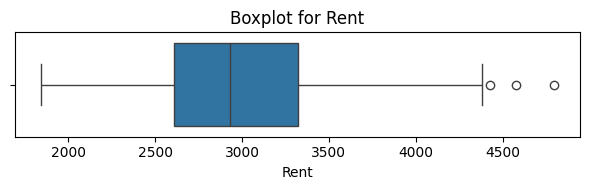

In [18]:
# Outlier Detection

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()

In [19]:
# Remove outliers using IQR

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute IQR for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for rows that are NOT outliers
non_outlier_mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                     (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out outliers
df = df[non_outlier_mask].reset_index(drop=True)

In [20]:
df.shape

(389, 8)

## Save to CSV

In [21]:
df.to_csv('../data/fakeville_data_clean.csv', index=False)